# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Eksik değerler için kütüphanelerin indirilmesi**

In [1]:
!pip install missingno

In [2]:
!pip install lightgbm

In [3]:
!pip install catboost

In [4]:

# 1.Modeli Değişken İsimleri Vererek Geliştirmek için Kütüphanelerin Import Edilmesi.
import statsmodels.formula.api as smf
#########################################
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.datasets import make_blobs
# 2.PCA Temel Bileşen Regresyonu Algoritması için Kütüphanenin Import Edilmesi.
from sklearn.decomposition import PCA

#################################################################################
# Veri Manipülasyonu ve Matematiksel Hesaplamalar için Kütüphanelerin Import Edilmesi.
#################################################################################
import pandas as pd
import numpy as np

#################################################################################
# Grafik Çizimleri için Kütüphanelerin Import Edilmesi.
#################################################################################
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

#################################################################################
# Boyut İndirgeme için Gerekli Kütüphanenin Import Edilmesi. 
#################################################################################
from sklearn.decomposition import PCA

#################################################################################
# Model Seçme İşlemleri için Kütüphanelerin Import Edilmesi
#################################################################################
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict 
from sklearn.model_selection import cross_validate, validation_curve
from sklearn import model_selection

#################################################################################
# Eksik Değerler için Kütüphanenin Import Edilmesi.
#################################################################################
import missingno as msno

#################################################################################
# Çok Değişkenli Aykırı Değerleri Yakalamak için Kütüphanenin Import Edilmesi.
#################################################################################
from sklearn.neighbors import LocalOutlierFactor

#################################################################################
# Encode İşlemleri için Gerekli Kütüphanelerin Import Edilmesi.
#################################################################################
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#################################################################################
# Ölçeklendirme için Kütüphanelerin Import Edilmesi.
#################################################################################
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.preprocessing import scale

import joblib
#################################################################################
# Hiperparametre Optimizasyonu için Kütüphanelerin Import Edilmesi.
#################################################################################
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#################################################################################
# Başarı Değerlendirme için Kütüphanelerin Import Edilmesi.
#################################################################################
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
#################################################################################
# Çıktı göründüleri için ayarlamaların yapılması.
#################################################################################
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
# pd.set_option("display.float_format", lambda x: "%3.f" % x)
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option("display.width", 5000)

#################################################################################
# Bazı Uyarıları Almamak için Kütüpanelerin Import Edilmesi.
#################################################################################
import warnings
from warnings import filterwarnings
filterwarnings('ignore')
warnings.simplefilter(action="ignore", category=Warning) #Olası bazı hataları ignore ediyoruz, görmezden geliyoruz.

**DENETİMLİ ÖĞRENME Algoritmaları = LGBMRegressor, CatBoostRegressor**

In [5]:
import pandas as pd
import numpy as np

**Football_teams_price_data.csv dosyası okutuldu.**

In [6]:
df = pd.read_csv("/kaggle/input/football-teams-price-prediction/Football_teams_price_data.csv")

**ilk 5 gözleme bakma kodu**

In [7]:
df.head()

AveragePlayerAge  TotalGoalsLastSeason  MatchesWonLastSeason  MatchesDrawnLastSeason  MatchesLostLastSeason  TotalGoalsConcededLastSeason  TotalRevenueLastSeason  StadiumCapacity  AverageAttendance  TransferSpendingLastSeason  TransferIncomeLastSeason  NumberOfTrophies  MarketValueOfSquad  AveragePlayerMarketValue  YouthAcademyRating      League  Country    Manager TeamFormation    PlayingStyle HomeCity   StadiumType MainSponsor KitManufacturer OwnershipType          Price
0            24.367                    28                    16                      36                     20                            51                 337.552            55766          5,229.743                     177.592                    79.973                49             713.969                    15.848              14.361     La Liga  England  Manager B       4-2-3-1  Counter-Attack   City C  Multipurpose   Sponsor B  Manufacturer B       Private  4,375,181,628
1            34.162                    89                    12                      35                     31                            84                 264.850            15307         46,172.739                     125.442                     7.679                38             236.645                    26.732              23.967  Bundesliga    Spain  Manager C         3-4-3       Defensive   City C  Multipurpose   Sponsor A  Manufacturer B    Consortium    859,750,388
2            30.444                    43                     3                       9                     28                            72                 363.423            77050         78,334.255                      43.776                   136.649                38             410.502                    21.365              64.310     Ligue 1    Spain  Manager C         3-5-2       Attacking   City D       Classic   Sponsor A  Manufacturer C    Consortium  2,168,913,729
3            28.177                    84                    19                      19                     34                            22                 296.720            61440         60,080.424                     183.936                   168.683                 6             177.562                    21.484              82.352     La Liga    Italy  Manager C         4-3-3  Counter-Attack   City C       Classic   Sponsor D  Manufacturer B    Consortium  1,426,481,894
4            20.652                    36                    36                      10                      9                            80                 480.929            78563         10,940.951                      14.882                   188.768                11             562.114                    26.938              90.614     Serie A   France  Manager D       4-2-3-1  Counter-Attack   City D    Historical   Sponsor C  Manufacturer B    Consortium  4,038,110,631

**Veri seti 50000 gözlemden 26 değişkenden oluşuyor** 

In [8]:
df.shape

(50000, 26)

In [9]:
df.sort_values('Price', ascending = False).head(10)

AveragePlayerAge  TotalGoalsLastSeason  MatchesWonLastSeason  MatchesDrawnLastSeason  MatchesLostLastSeason  TotalGoalsConcededLastSeason  TotalRevenueLastSeason  StadiumCapacity  AverageAttendance  TransferSpendingLastSeason  TransferIncomeLastSeason  NumberOfTrophies  MarketValueOfSquad  AveragePlayerMarketValue  YouthAcademyRating          League  Country    Manager TeamFormation    PlayingStyle HomeCity   StadiumType MainSponsor KitManufacturer OwnershipType        Price
18396            24.383                    93                    16                      10                     22                            23                 242.504            17884         32,650.179                      74.685                   144.990                41             351.285                    45.801               6.813  Premier League    Spain  Manager A         4-3-3       Defensive   City A       Classic   Sponsor C  Manufacturer B    Consortium  999,857,572
34183            23.598                    46                    18                       2                     33                            21                 399.694            23272         70,924.951                     175.959                   163.410                25             535.847                    23.889              19.000         La Liga    Italy  Manager D         4-4-2      Possession   City E  Multipurpose   Sponsor D  Manufacturer A     Fan-Owned  999,759,245
29289            27.472                    27                    28                      27                     12                            37                 200.821            32656         28,257.446                     136.533                   170.790                32             282.821                    27.352              14.002         Ligue 1    Italy  Manager B       4-2-3-1       Defensive   City A    Historical   Sponsor C  Manufacturer A    Consortium  999,621,921
12275            24.643                    83                     2                      12                      5                            72                 295.413            27171         79,029.691                      83.109                   136.070                11             668.614                    16.460              31.263         La Liga    Italy  Manager A         4-4-2       Defensive   City B        Modern   Sponsor B  Manufacturer A        Public  999,512,764
4561             22.883                    55                    33                      20                      6                            35                 359.992            28452         60,159.102                     164.499                   118.682                47             268.117                    29.505              82.130         La Liga   France  Manager B         3-5-2       Attacking   City A        Modern   Sponsor B  Manufacturer B    Consortium  999,467,232
11929            22.058                    95                    35                      25                      3                            77                 116.724            17397         87,162.412                     147.452                    11.877                 5             565.363                    44.775              86.182  Premier League   France  Manager D         4-4-2      Possession   City D        Modern   Sponsor B  Manufacturer C        Public  999,367,322
28875            28.204                    53                    23                      13                      5                            71                 398.349            67621         64,678.083                     101.016                   121.116                33             960.083                    30.906              91.094      Bundesliga  England  Manager C         4-4-2  Counter-Attack   City E       Classic   Sponsor C  Manufacturer A     Fan-Owned  999,308,368
22682            31.989                    29                    24                       4                    

Hedef değişkeni büyükten küçüge sıralayıp ilk 10 satır getirildi.

In [10]:
df.isnull().sum()

AveragePlayerAge                0
TotalGoalsLastSeason            0
MatchesWonLastSeason            0
MatchesDrawnLastSeason          0
MatchesLostLastSeason           0
TotalGoalsConcededLastSeason    0
TotalRevenueLastSeason          0
StadiumCapacity                 0
AverageAttendance               0
TransferSpendingLastSeason      0
TransferIncomeLastSeason        0
NumberOfTrophies                0
MarketValueOfSquad              0
AveragePlayerMarketValue        0
YouthAcademyRating              0
League                          0
Country                         0
Manager                         0
TeamFormation                   0
PlayingStyle                    0
HomeCity                        0
StadiumType                     0
MainSponsor                     0
KitManufacturer                 0
OwnershipType                   0
Price                           0
dtype: int64

**Veri setinde eksik değer kontrolü yapıldı**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AveragePlayerAge              50000 non-null  float64
 1   TotalGoalsLastSeason          50000 non-null  int64  
 2   MatchesWonLastSeason          50000 non-null  int64  
 3   MatchesDrawnLastSeason        50000 non-null  int64  
 4   MatchesLostLastSeason         50000 non-null  int64  
 5   TotalGoalsConcededLastSeason  50000 non-null  int64  
 6   TotalRevenueLastSeason        50000 non-null  float64
 7   StadiumCapacity               50000 non-null  int64  
 8   AverageAttendance             50000 non-null  float64
 9   TransferSpendingLastSeason    50000 non-null  float64
 10  TransferIncomeLastSeason      50000 non-null  float64
 11  NumberOfTrophies              50000 non-null  int64  
 12  MarketValueOfSquad            50000 non-null  float64
 13  A

**Veri seti hakkında bilgi sahibi olundu.**

In [12]:
df.describe()

AveragePlayerAge  TotalGoalsLastSeason  MatchesWonLastSeason  MatchesDrawnLastSeason  MatchesLostLastSeason  TotalGoalsConcededLastSeason  TotalRevenueLastSeason  StadiumCapacity  AverageAttendance  TransferSpendingLastSeason  TransferIncomeLastSeason  NumberOfTrophies  MarketValueOfSquad  AveragePlayerMarketValue  YouthAcademyRating
count        50,000.000            50,000.000            50,000.000              50,000.000             50,000.000                    50,000.000              50,000.000       50,000.000         50,000.000                  50,000.000                50,000.000        50,000.000          50,000.000                50,000.000          50,000.000
mean             26.481                59.343                18.425                  18.604                 18.478                        59.539                 274.506       54,854.568         47,425.311                      99.846                   100.407            24.585             505.105                    25.249              50.000
std               4.903                23.096                10.955                  10.980                 10.997                        23.050                 130.150       25,986.350         24,578.632                      57.667                    57.610            14.426             286.475                    14.298              28.828
min              18.000                20.000                 0.000                   0.000                  0.000                        20.000                  50.004       10,013.000          5,003.396                       0.006                     0.004             0.000              10.006                     0.500               0.000
25%              22.231                39.000                 9.000                   9.000                  9.000                        40.000                 161.260       32,312.250         26,181.373                      50.196                    50.355            12.000             257.682                    12.808              25.102
50%              26.481                59.000                18.000                  19.000                 18.000                        60.000                 274.402       54,814.000         47,449.443                      99.928                   101.043            25.000             503.947                    25.294              50.081
75%              30.721                79.000                28.000                  28.000                 28.000                        79.000                 387.154       77,337.250         68,720.698                     149.525                   150.071            37.000             752.608                    37.613              74.788
max              35.000                99.000                37.000                  37.000                 37.000                        99.000                 500.000       99,997.000         89,998.494                     199.997                   200.000            49.000             999.968                    50.000              99.997

**Veri setinin istatistiksel özeti**

In [13]:
def grab_col_names(dataframe, cat_th = 10, car_th = 20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"] 
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols += num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"Obsertavions - (Gözlem Sayısı): {dataframe.shape[0]}")
    print(f"Variables (Değişken Sayısı): {dataframe.shape[1]}")
    print(f"cat_cols (Kategorik Değişkenler): {len(cat_cols)}")
    print(f"num_cols (Sayısal Değişkenler): {len(num_cols)}")
    print(f"cat_but_car (Kardinalitesi Yüksek Değişkenler): {len(cat_but_car)}")
    print(f"num_but_cat (Sayısal Görünümlü Kategorik Değişkenler): {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car

**Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.**

In [14]:
cat_cols, num_cols, cat_but_car = grab_col_names(df) 

Obsertavions - (Gözlem Sayısı): 50000
Variables (Değişken Sayısı): 26
cat_cols (Kategorik Değişkenler): 10
num_cols (Sayısal Değişkenler): 15
cat_but_car (Kardinalitesi Yüksek Değişkenler): 1
num_but_cat (Sayısal Görünümlü Kategorik Değişkenler): 0


In [15]:
cat_cols

['League',
 'Country',
 'Manager',
 'TeamFormation',
 'PlayingStyle',
 'HomeCity',
 'StadiumType',
 'MainSponsor',
 'KitManufacturer',
 'OwnershipType']

**Kategorik değişken listesi**

In [16]:
num_cols

['AveragePlayerAge',
 'TotalGoalsLastSeason',
 'MatchesWonLastSeason',
 'MatchesDrawnLastSeason',
 'MatchesLostLastSeason',
 'TotalGoalsConcededLastSeason',
 'TotalRevenueLastSeason',
 'StadiumCapacity',
 'AverageAttendance',
 'TransferSpendingLastSeason',
 'TransferIncomeLastSeason',
 'NumberOfTrophies',
 'MarketValueOfSquad',
 'AveragePlayerMarketValue',
 'YouthAcademyRating']

**Nümerik değişken listesi**

In [17]:
cat_but_car

['Price']

**Kardinalitesi yüksek değişken listesi**

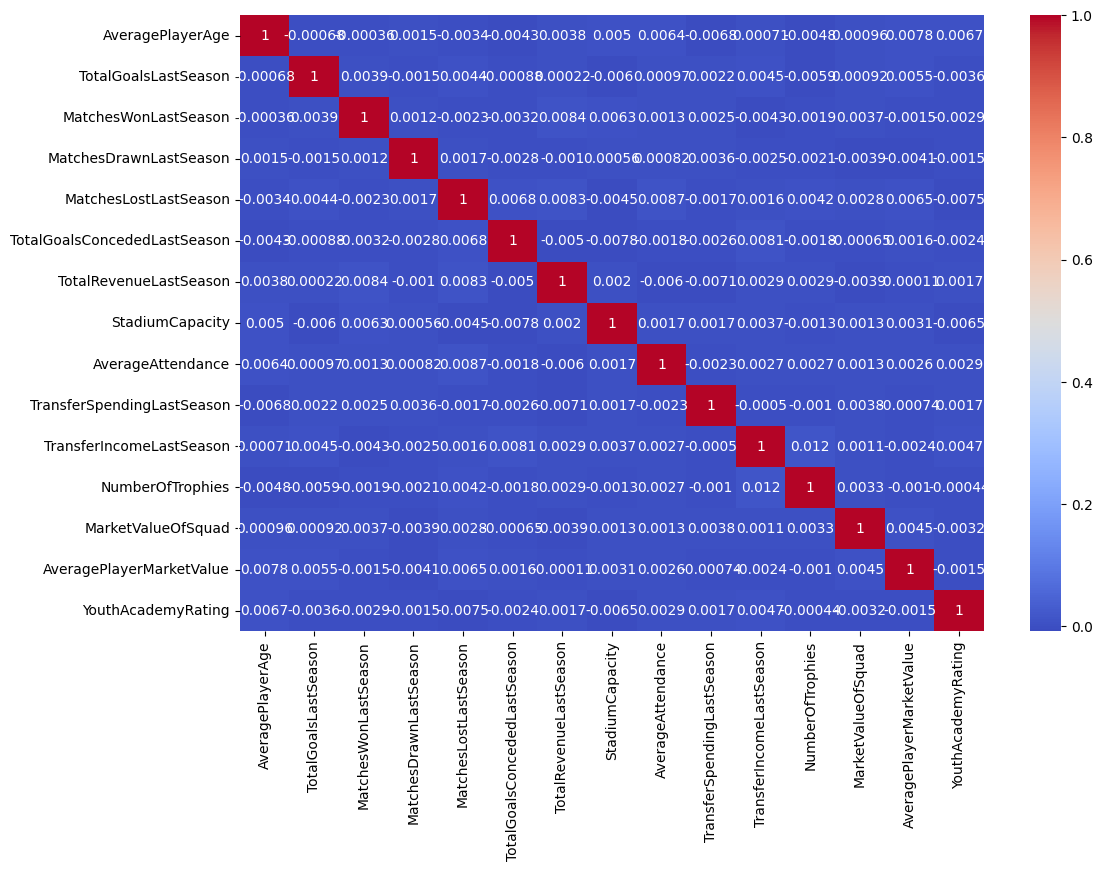

In [18]:
correlation_matrix = df[num_cols].corr() # df[num_cols], num_cols, veri setindeki sayısal sütunların listesini verir. 
#df ise veri setinin tamamını ifade eder. Bu satır, yalnızca sayısal sütunları verir.
#.corr() Bu metod, sayısal sütunlar arasında korelasyon katsayılarını hesaplar. 
#Korelasyon katsayısı (-1 ile +1 arasında bir değer) iki değişkenin birbirleriyle olan ilişkisini ölçer
plt.figure(figsize=(12, 8)) #Isı haritasının (heatmap) boyutlarını ayarlamak için kullanılır. 
#Grafik, 12 birim genişliğinde ve 8 birim yüksekliğinde olacak. 
#Bu, görselleştirmenin daha net ve okunabilir olmasını sağlar.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') #Seaborn kütüphanesinin heatmap fonksiyonu kullanılarak korelasyon matrisi görselleştirilir.
#correlation_matrix, Hesaplanan korelasyon matrisi, ısı haritasında kullanılacak veri setidir.
#annot=True, Hücrelerin içine korelasyon değerlerini yazdırır, bu sayede her hücredeki değeri görebilirsiniz.
#cmap= coolwarm, Renk haritası (colormap) olarak 'coolwarm' seçilmiştir. Bu renk skalası, 
#düşük korelasyonlar için soğuk tonlar (mavi) ve yüksek korelasyonlar için sıcak tonlar (kırmızı) kullanır.
plt.show() # Çizilen ısı haritasını ekranda gösterir.

***Bu kod, korelasyon matrisi oluşturarak bu matrisi bir ısı haritası (heatmap) üzerinde görselleştirmeyi sağlar. Korelasyon matrisi, bir veri setindeki sayısal sütunların birbirleriyle olan lineer ilişkilerini ölçer ve görsel olarak temsil eder. 1'e yakın pozitif değerler sıcak renklerle (kırmızı) gösterilirken, negatif değerler soğuk renklerle (mavi) gösterilir. Korelasyonu 0 olan değerler beyaza yakın bir renkle gösterilir.***

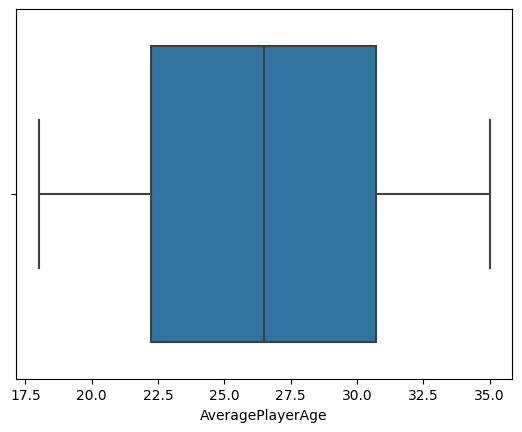

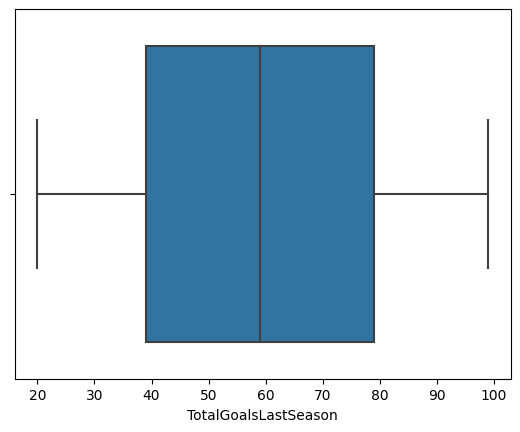

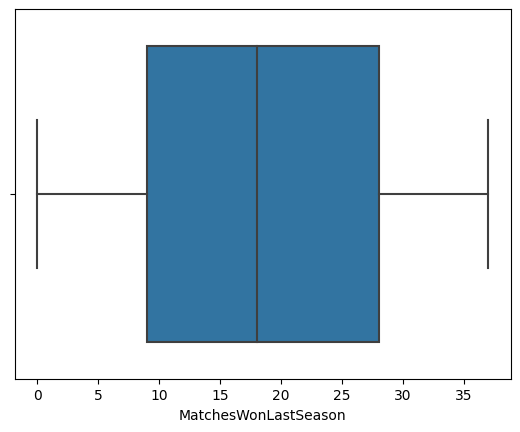

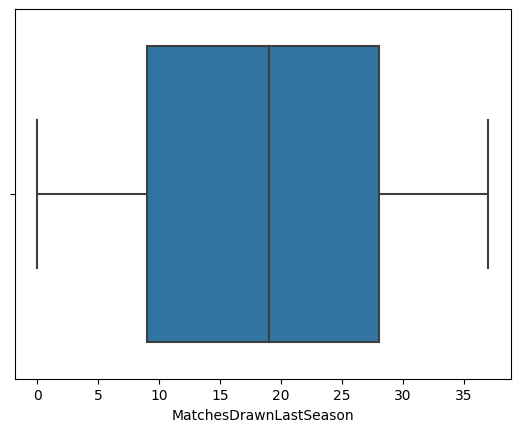

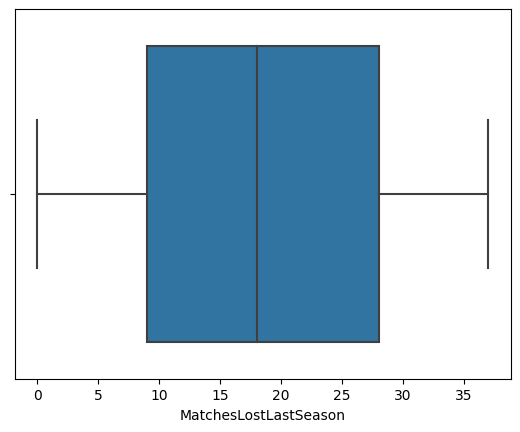

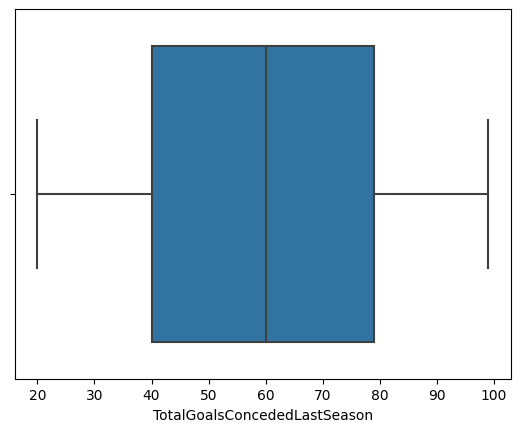

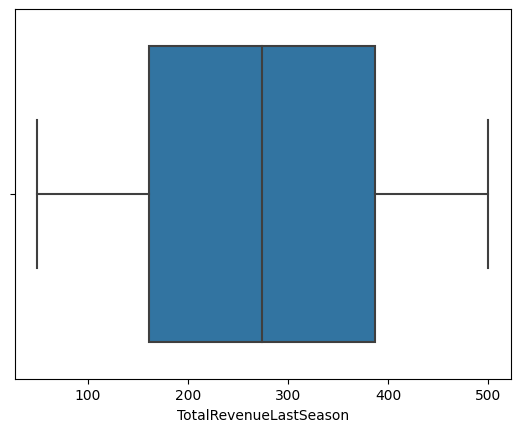

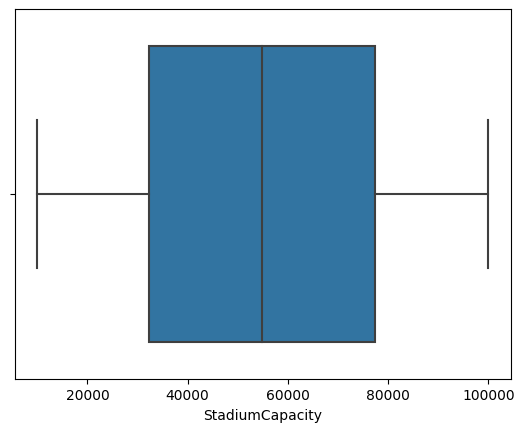

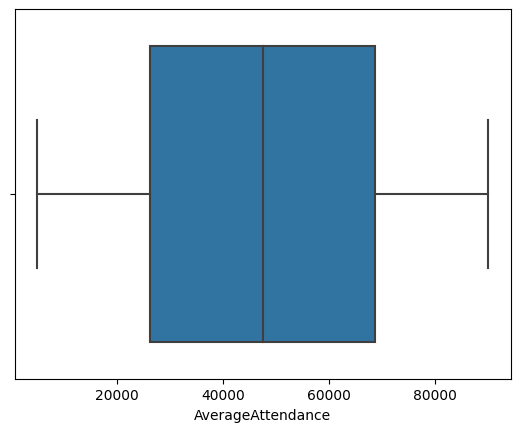

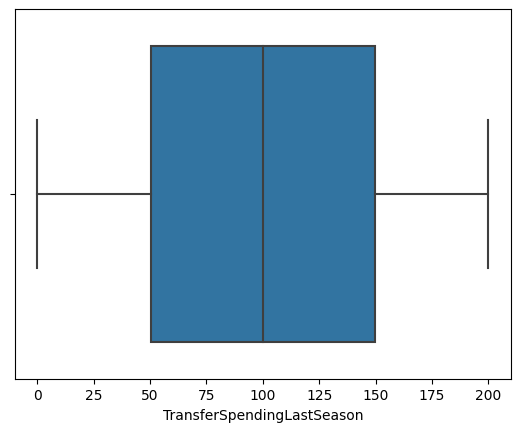

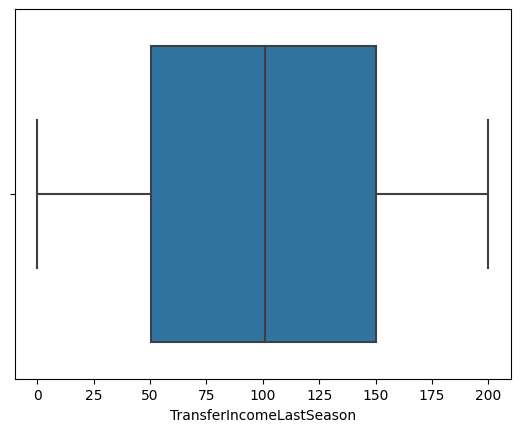

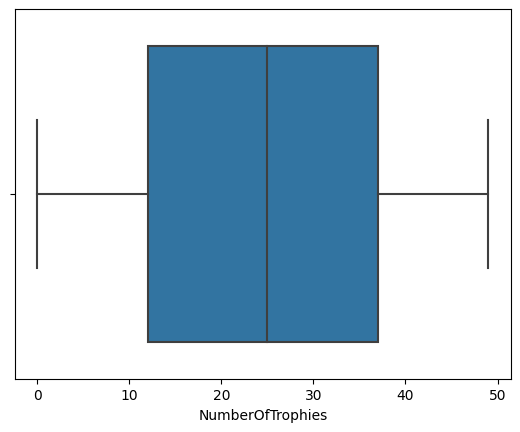

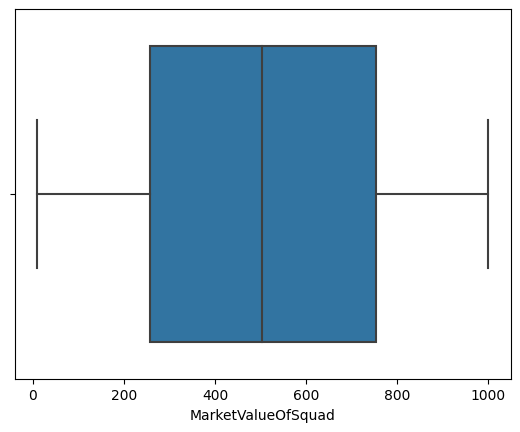

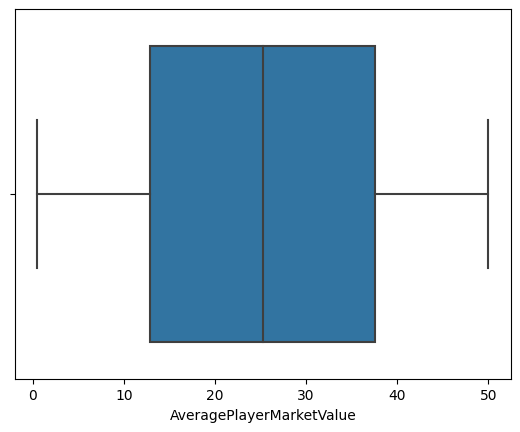

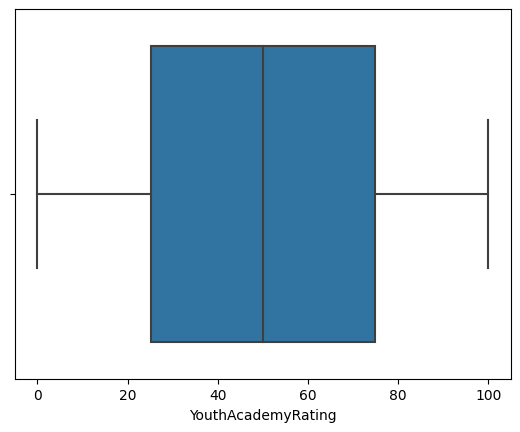

In [19]:
for col in num_cols: #num_cols ,Bu, veri setindeki sayısal sütunları içeren bir listeyi temsil eder. 
    #Döngü, bu listedeki her bir sütun için çalışır. col, döngü sırasında her bir sütun adı bu değişkene atanır. 
    #Böylece her adımda bir sayısal sütun üzerinde işlem yapılır.
    sns.boxplot(x = df[col]) #Seaborn kütüphanesinin boxplot fonksiyonu, 
    #tek bir değişkenin verilerini kutu grafiği şeklinde görselleştirir.x = df[col]: Bu kısım, col adındaki sütunu (sayısal veriyi) boxplot için kullanır. 
    #Yani, veri setindeki her sütun için bir kutu grafiği oluşturulacaktır.
    plt.show(block=True) #block=True, bir grafiği gösterdikten sonra kodun o noktada durmasını sağlar ve 
    #bir sonraki grafiği ancak mevcut olanı kapattıktan sonra gösterir. 

**Bu kod ile bir veri setindeki tüm sayısal sütunlar için ayrı ayrı kutu grafikleri oluşturulur ve bu grafikler üzerinden her bir sütunun verilerinin dağılımını , merkezini, ve aykırı değerlerini görsel olarak gösteririz.**

In [20]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95): # dataframe: Üzerinde işlem yapılacak Pandas DataFrame,
    #col_name: Aykırı değerlerin tespit edileceği sütunun adı, q1: Birinci çeyrek için kullanılacak yüzdelik değer. 
    #Varsayılan olarak %5'lik dilim seçitim (0.05).  Üçüncü çeyrek için kullanılacak yüzdelik değer. 
    #Varsayılan olarak %95'lik dilim seçtim. (0.95).Varsayılan değerler, verinin aşırı uçlarını belirlemek için alışılmış %25-%75 yerine %5-%95 dilimleri kullanır. 
    #Bu şekilde daha geniş bir veri aralığı ele alınır, ancak bu değerler isteğe bağlı olarak değiştirilebilir.
    quartile1 = dataframe[col_name].quantile(q1) #Verilen sütun için birinci çeyreklik dilimi hesaplar. 
    #Varsayılan olarak, sütunun %5'lik dilimindeki değer alınır.
    quartile3 = dataframe[col_name].quantile(q3) # Verilen sütun için üçüncü çeyreklik dilimi hesaplar. 
    #Varsayılan olarak, sütunun %95'lik dilimindeki değer alınır.
    interquantile_range = quartile3 - quartile1 #interquantile_range (IQR): Üçüncü çeyrek ile birinci çeyrek arasındaki farktır. 
    #IQR, veri setinin merkezi aralığını belirler ve aykırı değerleri tespit etmekte kullanılır.
    up_limit = quartile3 + 1.5 * interquantile_range #up_limit, Üst sınır (upper limit). IQR'nin 1.5 katı kadar fazlası üçüncü çeyrekten eklenir. 
    #Üst sınırın üzerinde kalan değerler aykırı olarak kabul edilir.
    low_limit = quartile1 - 1.5 * interquantile_range # low_limit Alt sınır (lower limit). IQR'nin 1.5 katı kadar eksiği birinci çeyrekten çıkarılır. 
    #Alt sınırın altında kalan değerler aykırı olarak kabul edilir.
    return low_limit, up_limit #Fonksiyon, aykırı değerlerin sınırlarını belirlemek için hesapladığı alt sınır ve üst sınırı döndürür.

**Bu kod ,bir veri çerçevesindeki (dataframe) belirli bir sütun için aykırı değerlerin tespit edilmesine yarayan alt ve üst sınırları hesaplar. Aykırı değerleri belirlemek için interquantile range (IQR) yöntemini kullanır. Bu yöntem, bir değişkenin birinci ve üçüncü çeyreklik dilimlerine (Q1 ve Q3) dayanarak aykırı değerleri sınırlar.**

In [21]:
for col in num_cols: 
    print(col, outlier_thresholds(df, col)) # Bu fonksiyon, daha önce tanımlanan outlier_thresholds() fonksiyonunu çağırarak, 
    #veri çerçevesi içindeki ilgili sütun (col) için alt ve üst sınırları hesaplar ve her bir sütun için bu sınırları ekrana yazdırır. 
    #Bu sınırların altında ve üstünde
    #kalan değerlere aykırı değer denir.

AveragePlayerAge (-4.063793186152914, 57.05763510423076)
TotalGoalsLastSeason (-85.0, 203.0)
MatchesWonLastSeason (-51.5, 88.5)
MatchesDrawnLastSeason (-51.5, 88.5)
MatchesLostLastSeason (-51.5, 88.5)
TotalGoalsConcededLastSeason (-82.5, 201.5)
TotalRevenueLastSeason (-534.752925450856, 1084.3923072762113)
StadiumCapacity (-107006.475, 217002.525)
AverageAttendance (-105702.93180209368, 200612.26028691084)
TransferSpendingLastSeason (-260.2805402188449, 459.7075395635379)
TransferIncomeLastSeason (-259.5552912878089, 459.85673897589646)
NumberOfTrophies (-65.5, 114.5)
MarketValueOfSquad (-1279.748135842184, 2290.737303109281)
AveragePlayerMarketValue (-63.937292390263465, 114.36931096676372)
YouthAcademyRating (-130.00711858593533, 230.02525943257672)


In [22]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None): 
        #Sütundaki değerlerin, üst sınırdan büyük veya alt sınırdan küçük olup olmadığını kontrol eder.
        #axis=None kullanımı,tüm veri çerçevesinde bu koşulların herhangi birinde aykırı değer olup olmadığını kontrol eder.
        return True #eğer herhangi bir aykırı değer varsa, True döner.
    else:
        return False #eğer aykırı bir değer yoksa, fonksiyon False (yanlış) döndürür.

In [23]:
for col in num_cols:
    print(col, check_outlier(df, col)) #check_outlier(df, col), daha önce tanımlanmış check_outlier() fonksiyonu, her sütun için çalıştırılır. 
    #Bu fonksiyon, sütunda aykırı değer olup olmadığını kontrol eder 
    #ve eğer aykırı değer varsa True, yoksa False döndürür.

AveragePlayerAge False
TotalGoalsLastSeason False
MatchesWonLastSeason False
MatchesDrawnLastSeason False
MatchesLostLastSeason False
TotalGoalsConcededLastSeason False
TotalRevenueLastSeason False
StadiumCapacity False
AverageAttendance False
TransferSpendingLastSeason False
TransferIncomeLastSeason False
NumberOfTrophies False
MarketValueOfSquad False
AveragePlayerMarketValue False
YouthAcademyRating False


**Bu sonuçlara göre veri setimizde aykırı değer yoktur sonucuna ulaşırız.**

In [24]:
df_encoded = pd.get_dummies(df, columns=['League', 'Country', 'Manager', 'TeamFormation', 'PlayingStyle', 'HomeCity', 'StadiumType', 'MainSponsor', 'KitManufacturer', 'OwnershipType'])
#veri setindeki kategorik değişkenleri get_dummies metodu kullanarak one-hot-encoding işlemi uyguladık.

In [25]:
df_encoded.head() #veri setinin ilk 5 değeri

AveragePlayerAge  TotalGoalsLastSeason  MatchesWonLastSeason  MatchesDrawnLastSeason  MatchesLostLastSeason  TotalGoalsConcededLastSeason  TotalRevenueLastSeason  StadiumCapacity  AverageAttendance  TransferSpendingLastSeason  TransferIncomeLastSeason  NumberOfTrophies  MarketValueOfSquad  AveragePlayerMarketValue  YouthAcademyRating          Price  League_Bundesliga  League_La Liga  League_Ligue 1  League_Premier League  League_Serie A  Country_England  Country_France  Country_Germany  Country_Italy  Country_Spain  Manager_Manager A  Manager_Manager B  Manager_Manager C  Manager_Manager D  TeamFormation_3-4-3  TeamFormation_3-5-2  TeamFormation_4-2-3-1  TeamFormation_4-3-3  TeamFormation_4-4-2  PlayingStyle_Attacking  PlayingStyle_Counter-Attack  PlayingStyle_Defensive  PlayingStyle_Possession  HomeCity_City A  HomeCity_City B  HomeCity_City C  HomeCity_City D  HomeCity_City E  StadiumType_Classic  StadiumType_Historical  StadiumType_Modern  StadiumType_Multipurpose  MainSponsor_Sponsor A  MainSponsor_Sponsor B  MainSponsor_Sponsor C  MainSponsor_Sponsor D  KitManufacturer_Manufacturer A  KitManufacturer_Manufacturer B  KitManufacturer_Manufacturer C  OwnershipType_Consortium  OwnershipType_Fan-Owned  OwnershipType_Private  OwnershipType_Public
0            24.367                    28                    16                      36                     20                            51                 337.552            55766          5,229.743                     177.592                    79.973                49             713.969                    15.848              14.361  4,375,181,628              False            True           False                  False           False             True           False            False          False          False              False               True              False              False                False                False                   True                False                False                   False                         True                   False                    False            False            False             True            False            False                False                   False               False                      True                  False                   True                  False                  False                           False                            True                           False                     False                    False                   True                 False
1            34.162                    89                    12                      35                     31                            84                 264.850            15307         46,172.739                     125.442                     7.679                38             236.645                    26.732              23.967    859,750,388               True           False           False                  False           False            False           False            False          False           True              False              False               True              False                 True                False                  False                False                False                   False                        False                    True                    False            False            False             True            False            False                False                   False               False                      True                   True                  False                  False                  False                           False                            True                           False                      True                    False                  False                 False
2            30.444                    43                     3                       9                     28                            72                 363.423            77050         78,334

**Veri setindeki kategorik değişkenlere one-hot encoding işlemi uygulayarak verileri 1 ve 0 olarak yeni sütunlara dönüştürdük.**

In [26]:
df_encoded['Price'] = df_encoded['Price'].replace({'\$': '', ',': ''}, regex=True) # dataframe içindeki Price 
#sütununa erişir.replace fonksiyonunu kullanarak belirli karakterleri değiştirmeyi sağlar.
df_encoded['Price'] = pd.to_numeric(df_encoded['Price'], errors='coerce') #Price sütunundaki değerleri sayısal bir 
#formata dönüştürür ve sayıya dönüştürülemeyen değerleri NaN ile değiştirir. 

In [27]:
df_encoded.dtypes # veri setindeki sütunların veri tiplerini görüntüler.

AveragePlayerAge                  float64
TotalGoalsLastSeason                int64
MatchesWonLastSeason                int64
MatchesDrawnLastSeason              int64
MatchesLostLastSeason               int64
TotalGoalsConcededLastSeason        int64
TotalRevenueLastSeason            float64
StadiumCapacity                     int64
AverageAttendance                 float64
TransferSpendingLastSeason        float64
TransferIncomeLastSeason          float64
NumberOfTrophies                    int64
MarketValueOfSquad                float64
AveragePlayerMarketValue          float64
YouthAcademyRating                float64
Price                               int64
League_Bundesliga                    bool
League_La Liga                       bool
League_Ligue 1                       bool
League_Premier League                bool
League_Serie A                       bool
Country_England                      bool
Country_France                       bool
Country_Germany                   

In [28]:
cat_cols, num_cols, cat_but_car = grab_col_names(df_encoded)

Obsertavions - (Gözlem Sayısı): 50000
Variables (Değişken Sayısı): 59
cat_cols (Kategorik Değişkenler): 43
num_cols (Sayısal Değişkenler): 16
cat_but_car (Kardinalitesi Yüksek Değişkenler): 0
num_but_cat (Sayısal Görünümlü Kategorik Değişkenler): 43


In [29]:
num_cols = [col for col in num_cols if col not in "Price"] #nümerik kolonlardan bağımlı değişken olan Price
#değişkenini çıkarıyoruz. Ölçekleme içine almamız gerektiği için.

In [30]:
scaler = StandardScaler() #verileri standartlaştırmak için StandardScaler sınıfından bir örnek oluşturur. 

In [31]:
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])# adlı dataframe de belirtilen sayısal sütunları (num_cols) standartlaştırmak için kullanılır.

In [32]:
df_encoded[num_cols].head() #standartlaştırılan sayısal sütunları görüntülemek için kullanılır.

AveragePlayerAge  TotalGoalsLastSeason  MatchesWonLastSeason  MatchesDrawnLastSeason  MatchesLostLastSeason  TotalGoalsConcededLastSeason  TotalRevenueLastSeason  StadiumCapacity  AverageAttendance  TransferSpendingLastSeason  TransferIncomeLastSeason  NumberOfTrophies  MarketValueOfSquad  AveragePlayerMarketValue  YouthAcademyRating
0            -0.431                -1.357                -0.221                   1.584                  0.138                        -0.370                   0.484            0.035             -1.717                       1.348                    -0.355             1.692               0.729                    -0.658              -1.236
1             1.567                 1.284                -0.587                   1.493                  1.139                         1.061                  -0.074           -1.522             -0.051                       0.444                    -1.610             0.930              -0.937                     0.104              -0.903
2             0.808                -0.708                -1.408                  -0.875                  0.866                         0.541                   0.683            0.854              1.258                      -0.972                     0.629             0.930              -0.330                    -0.272               0.496
3             0.346                 1.068                 0.052                   0.036                  1.411                        -1.629                   0.171            0.253              0.515                       1.458                     1.185            -1.288              -1.143                    -0.263               1.122
4            -1.189                -1.011                 1.604                  -0.784                 -0.862                         0.888                   1.586            0.912             -1.484                      -1.473                     1.534            -0.942               0.199                     0.118               1.409

In [33]:
df_encoded.head(5) #veri setinin son halini döndürür.

AveragePlayerAge  TotalGoalsLastSeason  MatchesWonLastSeason  MatchesDrawnLastSeason  MatchesLostLastSeason  TotalGoalsConcededLastSeason  TotalRevenueLastSeason  StadiumCapacity  AverageAttendance  TransferSpendingLastSeason  TransferIncomeLastSeason  NumberOfTrophies  MarketValueOfSquad  AveragePlayerMarketValue  YouthAcademyRating       Price  League_Bundesliga  League_La Liga  League_Ligue 1  League_Premier League  League_Serie A  Country_England  Country_France  Country_Germany  Country_Italy  Country_Spain  Manager_Manager A  Manager_Manager B  Manager_Manager C  Manager_Manager D  TeamFormation_3-4-3  TeamFormation_3-5-2  TeamFormation_4-2-3-1  TeamFormation_4-3-3  TeamFormation_4-4-2  PlayingStyle_Attacking  PlayingStyle_Counter-Attack  PlayingStyle_Defensive  PlayingStyle_Possession  HomeCity_City A  HomeCity_City B  HomeCity_City C  HomeCity_City D  HomeCity_City E  StadiumType_Classic  StadiumType_Historical  StadiumType_Modern  StadiumType_Multipurpose  MainSponsor_Sponsor A  MainSponsor_Sponsor B  MainSponsor_Sponsor C  MainSponsor_Sponsor D  KitManufacturer_Manufacturer A  KitManufacturer_Manufacturer B  KitManufacturer_Manufacturer C  OwnershipType_Consortium  OwnershipType_Fan-Owned  OwnershipType_Private  OwnershipType_Public
0            -0.431                -1.357                -0.221                   1.584                  0.138                        -0.370                   0.484            0.035             -1.717                       1.348                    -0.355             1.692               0.729                    -0.658              -1.236  4375181628              False            True           False                  False           False             True           False            False          False          False              False               True              False              False                False                False                   True                False                False                   False                         True                   False                    False            False            False             True            False            False                False                   False               False                      True                  False                   True                  False                  False                           False                            True                           False                     False                    False                   True                 False
1             1.567                 1.284                -0.587                   1.493                  1.139                         1.061                  -0.074           -1.522             -0.051                       0.444                    -1.610             0.930              -0.937                     0.104              -0.903   859750388               True           False           False                  False           False            False           False            False          False           True              False              False               True              False                 True                False                  False                False                False                   False                        False                    True                    False            False            False             True            False            False                False                   False               False                      True                   True                  False                  False                  False                           False                            True                           False                      True                    False                  False                 False
2             0.808                -0.708                -1.408                  -0.875                  0.866                         0.541                   0.683            0.854              1.258     

In [34]:
salary = df_encoded["Price"] #bu kod df_encoded adlı Pandas DataFrame'indeki Price sütununu salary 
#adlı bir değişkene atamak için kullanılır.

In [35]:
df_encoded = df_encoded.drop("Price", axis = 1) #Price sütununu kaldırarak veri setini güncelleme işlemi gerçekleştirir.

In [36]:
df_encoded["Price"] = salary #salary değişkenindeki değerleri df_encoded DataFrame'indeki Price sütununa atar. Bu, 
#veri setinin güncellenmesine ve modelleme sürecinde kullanılabilir hale gelmesine yardımcı olur.

In [37]:
df_encoded.head(5)

AveragePlayerAge  TotalGoalsLastSeason  MatchesWonLastSeason  MatchesDrawnLastSeason  MatchesLostLastSeason  TotalGoalsConcededLastSeason  TotalRevenueLastSeason  StadiumCapacity  AverageAttendance  TransferSpendingLastSeason  TransferIncomeLastSeason  NumberOfTrophies  MarketValueOfSquad  AveragePlayerMarketValue  YouthAcademyRating  League_Bundesliga  League_La Liga  League_Ligue 1  League_Premier League  League_Serie A  Country_England  Country_France  Country_Germany  Country_Italy  Country_Spain  Manager_Manager A  Manager_Manager B  Manager_Manager C  Manager_Manager D  TeamFormation_3-4-3  TeamFormation_3-5-2  TeamFormation_4-2-3-1  TeamFormation_4-3-3  TeamFormation_4-4-2  PlayingStyle_Attacking  PlayingStyle_Counter-Attack  PlayingStyle_Defensive  PlayingStyle_Possession  HomeCity_City A  HomeCity_City B  HomeCity_City C  HomeCity_City D  HomeCity_City E  StadiumType_Classic  StadiumType_Historical  StadiumType_Modern  StadiumType_Multipurpose  MainSponsor_Sponsor A  MainSponsor_Sponsor B  MainSponsor_Sponsor C  MainSponsor_Sponsor D  KitManufacturer_Manufacturer A  KitManufacturer_Manufacturer B  KitManufacturer_Manufacturer C  OwnershipType_Consortium  OwnershipType_Fan-Owned  OwnershipType_Private  OwnershipType_Public       Price
0            -0.431                -1.357                -0.221                   1.584                  0.138                        -0.370                   0.484            0.035             -1.717                       1.348                    -0.355             1.692               0.729                    -0.658              -1.236              False            True           False                  False           False             True           False            False          False          False              False               True              False              False                False                False                   True                False                False                   False                         True                   False                    False            False            False             True            False            False                False                   False               False                      True                  False                   True                  False                  False                           False                            True                           False                     False                    False                   True                 False  4375181628
1             1.567                 1.284                -0.587                   1.493                  1.139                         1.061                  -0.074           -1.522             -0.051                       0.444                    -1.610             0.930              -0.937                     0.104              -0.903               True           False           False                  False           False            False           False            False          False           True              False              False               True              False                 True                False                  False                False                False                   False                        False                    True                    False            False            False             True            False            False                False                   False               False                      True                   True                  False                  False                  False                           False                            True                           False                      True                    False                  False                 False   859750388
2             0.808                -0.708                -1.408                  -0.875                  0.866                         0.541                   0.683            0.854              1.258     

In [38]:
X = df_encoded.drop("Price", axis = 1) #df_encoded DataFrame'indeki Price sütununu kaldırarak geriye kalan özellikleri X değişkenine atar. Bu, makine öğrenimi modelinin eğitilmesi için gerekli olan verilerin hazırlanmasında önemli bir adımdır.

In [39]:
y = df_encoded[["Price"]] #df_encoded DataFrame'indeki Price sütununu y değişkenine atayarak hedef değişkeni belirler. Makine öğrenimi modelinin eğitim sürecinde 
#modelin tahmin etmeye çalıştığı değerler y ile temsil edilir.

**Veri seti bağımlı (y hedef) ve bağımsız (X özellik) değişkenler olarak ikiye ayrıldı.**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 17)
# Veri setini eğitim ve test setlerine ayırmak için kullanılır.train_test_split fonksiyonu, özellikler (X) ve hedef değişken (y) 
#olmak üzere iki veri setini belirli bir oranda eğitim ve test alt kümelerine böler. 
#veri setinin %20'si test seti için ayrılır, geri kalan %80 ise eğitim seti için kullanılır.
# Veri setini bölerken rastgelelik kontrolü için kullanılır. Aynı random_state değeri kullanıldığında, her seferinde aynı eğitim ve test setleri elde edilir.
#X_train, Eğitim verisi olarak kullanılacak olan bağımsız değişkenleri ifade eder.
#X_test, Test verisi olarak kullanılacak olan bağımsız değişkenler
#y_train, Eğitim setine ait hedef değişkenler.
#y_test, Test setine ait hedef değişkenler.

**Eğitim Seti (Train Set): Modeli eğitmek için kullanılır. Model, bu verilerle öğrenir.
Test Seti: Modelin performansını değerlendirmek için kullanılır. Model bu veriyi göremediği için, ne kadar iyi genellenebilir olduğunu ölçmek amacıyla test setinde değerlendirilir.**

In [41]:
lgbm_model = LGBMRegressor().fit(X, y) #LightGBM kütüphanesi kullanılarak bir regresyon modelini eğitmek için kullanılır. 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025965 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2711
[LightGBM] [Info] Number of data points in the train set: 50000, number of used features: 58
[LightGBM] [Info] Start training from score 2750725969.022720


In [42]:
cv_results = cross_validate(lgbm_model,
                             X, y,
                             cv = 5,
                             scoring = ["neg_root_mean_squared_error"])
#LightGBM modelinin X ve y veri seti üzerinde 5 katlı çapraz doğrulama ile değerlendirilmesini sağlar. Çıktı olarak, modelin her katmandaki performansını gösteren negatif kök ortalama kare hata (RMSE) değerleri elde edilir. 
#Bu değerler, modelin genel başarısını anlamak için kullanılabilir.

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028721 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2711
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 58
[LightGBM] [Info] Start training from score 2744681710.760800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2711
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 58
[LightGBM] [Info] Start training from score 2751069270.006400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, 

In [43]:
lgbm_cv_rmse = -cv_results["test_neg_root_mean_squared_error"].mean()
#LightGBM (LGBM) modelinin çapraz doğrulama (cross-validation) sonuçlarından, test veri setinde elde edilen negatif kök ortalama kare hata 
#(RMSE) değerinin ortalamasını alarak, bu değeri pozitif hale getirir.

In [44]:
lgbm_cv_rmse

1308755561.3773003

In [45]:
catb_model = CatBoostRegressor().fit(X, y) #CatBoost regresyon modelini eğitmek için kullanılır.

Learning rate set to 0.075966
0:	learn: 1303920864.7054539	total: 65.6ms	remaining: 1m 5s
1:	learn: 1303789541.1748004	total: 74ms	remaining: 36.9s
2:	learn: 1303601548.9978685	total: 83.3ms	remaining: 27.7s
3:	learn: 1303455217.0083253	total: 92.4ms	remaining: 23s
4:	learn: 1303325919.5128341	total: 103ms	remaining: 20.4s
5:	learn: 1303211276.8855543	total: 113ms	remaining: 18.7s
6:	learn: 1303065127.7509234	total: 121ms	remaining: 17.2s
7:	learn: 1302929154.6212778	total: 130ms	remaining: 16.1s
8:	learn: 1302769874.8513956	total: 140ms	remaining: 15.4s
9:	learn: 1302614851.1101627	total: 150ms	remaining: 14.9s
10:	learn: 1302462357.6649818	total: 159ms	remaining: 14.3s
11:	learn: 1302309944.3169942	total: 170ms	remaining: 14s
12:	learn: 1302148410.1649184	total: 179ms	remaining: 13.6s
13:	learn: 1301984063.6283040	total: 189ms	remaining: 13.3s
14:	learn: 1301851595.1208017	total: 198ms	remaining: 13s
15:	learn: 1301754073.2654495	total: 207ms	remaining: 12.7s
16:	learn: 1301586502.18

In [46]:
cv_results = cross_validate(catb_model,
                             X, y,
                             cv = 5,
                             scoring = ["neg_root_mean_squared_error"])

Learning rate set to 0.073334
0:	learn: 1304224950.5455799	total: 11.6ms	remaining: 11.6s
1:	learn: 1304054238.4322846	total: 21.1ms	remaining: 10.5s
2:	learn: 1303873915.2017787	total: 31.1ms	remaining: 10.3s
3:	learn: 1303681681.9058774	total: 40.9ms	remaining: 10.2s
4:	learn: 1303515547.5938764	total: 50.6ms	remaining: 10.1s
5:	learn: 1303383369.5516775	total: 60.6ms	remaining: 10s
6:	learn: 1303149310.2004356	total: 70.6ms	remaining: 10s
7:	learn: 1302928193.4656830	total: 79.8ms	remaining: 9.9s
8:	learn: 1302773979.6575799	total: 89.2ms	remaining: 9.83s
9:	learn: 1302542929.1953778	total: 98.7ms	remaining: 9.77s
10:	learn: 1302377167.5259929	total: 107ms	remaining: 9.66s
11:	learn: 1302208072.1990445	total: 119ms	remaining: 9.81s
12:	learn: 1302037440.7285113	total: 127ms	remaining: 9.65s
13:	learn: 1301798534.3407438	total: 136ms	remaining: 9.55s
14:	learn: 1301615802.6741436	total: 143ms	remaining: 9.39s
15:	learn: 1301457119.7167668	total: 151ms	remaining: 9.26s
16:	learn: 1301

In [47]:
catb_cv_rmse = -cv_results["test_neg_root_mean_squared_error"].mean()

In [48]:
catb_cv_rmse

1318492760.1225483

In [49]:
lgbm_model = LGBMRegressor().fit(X, y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034593 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2711
[LightGBM] [Info] Number of data points in the train set: 50000, number of used features: 58
[LightGBM] [Info] Start training from score 2750725969.022720


In [50]:
lgbm_params = {'colsample_bytree': [0.4, 1], #Her ağaç için rastgele olarak seçilen özelliklerin oranını belirler. 0.4 değeri, özelliklerin %40'ının kullanılması, 1 değeri ise tüm özelliklerin kullanılması anlamına gelir.
               'learning_rate': [0.1, 0.5], #Modelin öğrenme hızını belirler. Düşük değerler, modelin daha yavaş öğrenmesini sağlar, böylece daha iyi sonuçlar elde edilebilir ama eğitim süresi uzar. 0.1 ve 0.5, iki farklı öğrenme hızıdır.
               'n_estimators': [100, 200], #Toplam ağaç sayısını belirler. 100 veya 200 ağaç kullanmak, modelin karmaşıklığını ve kapasitesini etkiler.
               'max_depth': [-1, 1]} #Ağaçların maksimum derinliğini belirler. -1, derinlik sınırlaması olmaması anlamına gelirken, 1 değeri, ağaçların yalnızca bir dal (iki yaprak) oluşturmasına izin verir.

**LightGBM (LGBM) modelinin hiperparametrelerini ayarlamak için kullanılacak bir parametre grubunu tanımlar. Hiperparametreler,modelin eğitim sürecini ve performansını etkileyen ayarlardır.**

In [51]:
lgbm_gs_model = GridSearchCV(lgbm_model, 
                             lgbm_params, 
                             cv=5, 
                             n_jobs = -1, 
                             verbose = 1).fit(X, y) #LightGBM modelinin hiperparametrelerini optimize etmek için GridSearchCV kullanarak çapraz doğrulama yapar. 

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2711
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 58
[LightGBM] [Info] Start training from score 2744681710.760800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2711
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 58
[LightGBM] [Info] Start training from score 2751069270.006400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlin

In [52]:
lgbm_gs_model.best_params_ #modelin performansını artırmak için kullanılan en iyi hiperparametre kombinasyonunu elde etmeyi sağlar.

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 1,
 'n_estimators': 100}

In [53]:
lgbm_final_model = lgbm_model.set_params(**lgbm_gs_model.best_params_).fit(X, y) 
#en iyi hiperparametre ayarlarını kullanarak final modelini oluşturur. Bu model, daha önce elde edilen 
#sonuçlara göre daha iyi performans göstermesi beklenen bir modeldir ve tahmin yapmak için kullanılır.

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2711
[LightGBM] [Info] Number of data points in the train set: 50000, number of used features: 58
[LightGBM] [Info] Start training from score 2750725969.022720


In [54]:
cv_results = cross_validate(lgbm_final_model,
                             X, y,
                             cv = 5,
                             scoring = ["neg_root_mean_squared_error"])
#lgbm_final_model modelinin 5 katlı çapraz doğrulama ile performansını değerlendirir ve sonuçları cv_results değişkeninde saklar. 
#Bu sonuçlar, modelin doğruluğunu ve tahmin gücünü anlamak için kullanılmaktadır.

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028967 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2711
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 58
[LightGBM] [Info] Start training from score 2744681710.760800
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028870 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2711
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 58
[LightGBM] [Info] Start training from score 2751069270.006400
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, 

In [55]:
lgbm_ho_rmse = -cv_results["test_neg_root_mean_squared_error"].mean() #cross_validate ile elde edilen sonuçları kullanarak modelin test setindeki ortalama kök ortalama kare hata (RMSE) değerini hesaplar.

In [56]:
lgbm_ho_rmse

1304326015.7988899

In [57]:
catb_model = CatBoostRegressor().fit(X, y)

Learning rate set to 0.075966
0:	learn: 1303920864.7054539	total: 10.7ms	remaining: 10.7s
1:	learn: 1303789541.1748004	total: 19ms	remaining: 9.48s
2:	learn: 1303601548.9978685	total: 28.3ms	remaining: 9.4s
3:	learn: 1303455217.0083253	total: 37.6ms	remaining: 9.37s
4:	learn: 1303325919.5128341	total: 48.2ms	remaining: 9.59s
5:	learn: 1303211276.8855543	total: 58.7ms	remaining: 9.73s
6:	learn: 1303065127.7509234	total: 67.5ms	remaining: 9.57s
7:	learn: 1302929154.6212778	total: 76ms	remaining: 9.43s
8:	learn: 1302769874.8513956	total: 85.7ms	remaining: 9.44s
9:	learn: 1302614851.1101627	total: 95.8ms	remaining: 9.49s
10:	learn: 1302462357.6649818	total: 105ms	remaining: 9.45s
11:	learn: 1302309944.3169942	total: 114ms	remaining: 9.38s
12:	learn: 1302148410.1649184	total: 123ms	remaining: 9.33s
13:	learn: 1301984063.6283040	total: 133ms	remaining: 9.35s
14:	learn: 1301851595.1208017	total: 142ms	remaining: 9.3s
15:	learn: 1301754073.2654495	total: 151ms	remaining: 9.31s
16:	learn: 13015

In [58]:
catb_params = {'iterations': [500,1000],
               'learning_rate': [0.1, 0.9],
               'depth': [6,8]}

In [59]:
catb_gs_model = GridSearchCV(catb_model, catb_params, cv = 5, verbose=1).fit(X, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0:	learn: 1304170510.6411002	total: 8.39ms	remaining: 4.19s
1:	learn: 1303940614.4813776	total: 15.9ms	remaining: 3.96s
2:	learn: 1303698084.7339089	total: 23.8ms	remaining: 3.94s
3:	learn: 1303439969.7570322	total: 32.6ms	remaining: 4.04s
4:	learn: 1303217065.8052628	total: 40.4ms	remaining: 4s
5:	learn: 1303040586.0029974	total: 48.8ms	remaining: 4.02s
6:	learn: 1302737258.9727771	total: 57ms	remaining: 4.01s
7:	learn: 1302443246.0863566	total: 64.5ms	remaining: 3.97s
8:	learn: 1302239808.4066930	total: 72.1ms	remaining: 3.94s
9:	learn: 1301928982.5906036	total: 79.8ms	remaining: 3.91s
10:	learn: 1301706907.8574848	total: 87.1ms	remaining: 3.87s
11:	learn: 1301483296.5661063	total: 94.6ms	remaining: 3.85s
12:	learn: 1301206648.6777849	total: 104ms	remaining: 3.88s
13:	learn: 1300888209.2270005	total: 113ms	remaining: 3.92s
14:	learn: 1300645788.6240344	total: 121ms	remaining: 3.9s
15:	learn: 1300435216.8025723	total: 128ms	r

In [60]:
catb_params = {'iterations': [500,1000],
               'learning_rate': [0.1, 0.9],
               'depth': [6,8]}

In [61]:
catb_gs_model = GridSearchCV(catb_model, catb_params, cv = 5, verbose=1).fit(X, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0:	learn: 1304170510.6411002	total: 9.93ms	remaining: 4.95s
1:	learn: 1303940614.4813776	total: 19.2ms	remaining: 4.79s
2:	learn: 1303698084.7339089	total: 29ms	remaining: 4.8s
3:	learn: 1303439969.7570322	total: 38.6ms	remaining: 4.79s
4:	learn: 1303217065.8052628	total: 48.4ms	remaining: 4.79s
5:	learn: 1303040586.0029974	total: 58.6ms	remaining: 4.82s
6:	learn: 1302737258.9727771	total: 68.7ms	remaining: 4.84s
7:	learn: 1302443246.0863566	total: 81.4ms	remaining: 5s
8:	learn: 1302239808.4066930	total: 91.6ms	remaining: 5s
9:	learn: 1301928982.5906036	total: 101ms	remaining: 4.96s
10:	learn: 1301706907.8574848	total: 110ms	remaining: 4.91s
11:	learn: 1301483296.5661063	total: 120ms	remaining: 4.87s
12:	learn: 1301206648.6777849	total: 130ms	remaining: 4.89s
13:	learn: 1300888209.2270005	total: 141ms	remaining: 4.9s
14:	learn: 1300645788.6240344	total: 151ms	remaining: 4.88s
15:	learn: 1300435216.8025723	total: 160ms	remainin

In [62]:
catb_gs_model.best_params_

{'depth': 6, 'iterations': 500, 'learning_rate': 0.1}

In [63]:
catb_final_model = CatBoostRegressor(**catb_gs_model.best_params_).fit(X, y)

0:	learn: 1303860054.7412629	total: 10.3ms	remaining: 5.12s
1:	learn: 1303696441.4028111	total: 18.7ms	remaining: 4.66s
2:	learn: 1303517994.4776461	total: 28.2ms	remaining: 4.68s
3:	learn: 1303329100.1754112	total: 37.4ms	remaining: 4.63s
4:	learn: 1303160207.7704990	total: 47.9ms	remaining: 4.74s
5:	learn: 1303012233.3864284	total: 58.3ms	remaining: 4.8s
6:	learn: 1302841342.8163619	total: 66.9ms	remaining: 4.71s
7:	learn: 1302642389.0114357	total: 76ms	remaining: 4.67s
8:	learn: 1302436785.0121021	total: 85.6ms	remaining: 4.67s
9:	learn: 1302220671.9545407	total: 95.8ms	remaining: 4.69s
10:	learn: 1301989755.1345596	total: 104ms	remaining: 4.64s
11:	learn: 1301795605.0828445	total: 113ms	remaining: 4.61s
12:	learn: 1301599880.3279312	total: 123ms	remaining: 4.59s
13:	learn: 1301350468.8514564	total: 132ms	remaining: 4.58s
14:	learn: 1301177927.3032742	total: 141ms	remaining: 4.56s
15:	learn: 1301024698.6723211	total: 151ms	remaining: 4.56s
16:	learn: 1300806752.3589828	total: 160ms	

In [64]:
cv_results = cross_validate(catb_final_model,
                             X, y,
                             cv = 5,
                             scoring = ["neg_root_mean_squared_error"])

0:	learn: 1304170510.6411002	total: 7.78ms	remaining: 3.88s
1:	learn: 1303940614.4813776	total: 15.6ms	remaining: 3.87s
2:	learn: 1303698084.7339089	total: 23.3ms	remaining: 3.87s
3:	learn: 1303439969.7570322	total: 33.9ms	remaining: 4.2s
4:	learn: 1303217065.8052628	total: 42ms	remaining: 4.16s
5:	learn: 1303040586.0029974	total: 50.1ms	remaining: 4.13s
6:	learn: 1302737258.9727771	total: 58.3ms	remaining: 4.11s
7:	learn: 1302443246.0863566	total: 65.9ms	remaining: 4.05s
8:	learn: 1302239808.4066930	total: 74ms	remaining: 4.04s
9:	learn: 1301928982.5906036	total: 81.4ms	remaining: 3.99s
10:	learn: 1301706907.8574848	total: 88.7ms	remaining: 3.94s
11:	learn: 1301483296.5661063	total: 96.4ms	remaining: 3.92s
12:	learn: 1301206648.6777849	total: 105ms	remaining: 3.94s
13:	learn: 1300888209.2270005	total: 113ms	remaining: 3.94s
14:	learn: 1300645788.6240344	total: 121ms	remaining: 3.91s
15:	learn: 1300435216.8025723	total: 129ms	remaining: 3.89s
16:	learn: 1300249703.0876787	total: 137ms	

In [65]:
catb_ho_rmse = -cv_results["test_neg_root_mean_squared_error"].mean()

In [66]:
catb_ho_rmse

1314214127.8864572

In [67]:
model_name = ["1. Light Gradient Boosting Machines - LGBM",
              "2. Category Boosting - CatBoost"] #iki farklı makine öğrenimi modelinin adlarını içeren bir liste oluşturduk.

In [68]:
cv_lgbm = pd.DataFrame({"RMSE - Cross Validation": lgbm_cv_rmse}, index = ["LGBM"]) #LGBM modelinin çapraz doğrulama sonucu olarak hesaplanan ortalama kök ortalama kare hata (RMSE) değerini içeren dataframe kodu.

In [69]:
ho_lgbm = pd.DataFrame({"RMSE - Hyperparameter Optimization": lgbm_ho_rmse}, index = ["LGBM"]) #LGBM modelinin hiperparametre optimizasyonu sonucunda elde edilen ortalama kök ortalama kare hata (RMSE) değerini içeren dataframe kodu

In [70]:
lgbm = pd.concat([cv_lgbm, ho_lgbm], axis = 1) #oluşturulan iki dataframeyi birleştirir.

In [71]:
lgbm

RMSE - Cross Validation  RMSE - Hyperparameter Optimization
LGBM        1,308,755,561.377                   1,304,326,015.799

In [72]:
cv_catb = pd.DataFrame({"RMSE - Cross Validation": catb_cv_rmse}, index = ["CatBoost"])

In [73]:
ho_catb = pd.DataFrame({"RMSE - Hyperparameter Optimization": catb_ho_rmse}, index = ["CatBoost"])

In [74]:
catb = pd.concat([cv_catb, ho_catb], axis = 1)

In [75]:
catb

RMSE - Cross Validation  RMSE - Hyperparameter Optimization
CatBoost        1,318,492,760.123                   1,314,214,127.886

In [76]:
lgbm

RMSE - Cross Validation  RMSE - Hyperparameter Optimization
LGBM        1,308,755,561.377                   1,304,326,015.799

In [77]:
catb

RMSE - Cross Validation  RMSE - Hyperparameter Optimization
CatBoost        1,318,492,760.123                   1,314,214,127.886

In [78]:
all_model = pd.concat([lgbm,  catb],axis = 0) #iki pandas DataFrame'i (LGBM ve CatBoost sonuçlarını) birleştirir.

In [79]:
all_model #

RMSE - Cross Validation  RMSE - Hyperparameter Optimization
LGBM            1,308,755,561.377                   1,304,326,015.799
CatBoost        1,318,492,760.123                   1,314,214,127.886

**DENETİMSİZ ÖĞRENME = Kümeleme Algortiması**

In [80]:
df = pd.read_csv("/kaggle/input/football-teams-price-prediction/Football_teams_price_data.csv")

In [81]:
df = df.drop(columns=['Price'])  

In [82]:
df.head()

AveragePlayerAge  TotalGoalsLastSeason  MatchesWonLastSeason  MatchesDrawnLastSeason  MatchesLostLastSeason  TotalGoalsConcededLastSeason  TotalRevenueLastSeason  StadiumCapacity  AverageAttendance  TransferSpendingLastSeason  TransferIncomeLastSeason  NumberOfTrophies  MarketValueOfSquad  AveragePlayerMarketValue  YouthAcademyRating      League  Country    Manager TeamFormation    PlayingStyle HomeCity   StadiumType MainSponsor KitManufacturer OwnershipType
0            24.367                    28                    16                      36                     20                            51                 337.552            55766          5,229.743                     177.592                    79.973                49             713.969                    15.848              14.361     La Liga  England  Manager B       4-2-3-1  Counter-Attack   City C  Multipurpose   Sponsor B  Manufacturer B       Private
1            34.162                    89                    12                      35                     31                            84                 264.850            15307         46,172.739                     125.442                     7.679                38             236.645                    26.732              23.967  Bundesliga    Spain  Manager C         3-4-3       Defensive   City C  Multipurpose   Sponsor A  Manufacturer B    Consortium
2            30.444                    43                     3                       9                     28                            72                 363.423            77050         78,334.255                      43.776                   136.649                38             410.502                    21.365              64.310     Ligue 1    Spain  Manager C         3-5-2       Attacking   City D       Classic   Sponsor A  Manufacturer C    Consortium
3            28.177                    84                    19                      19                     34                            22                 296.720            61440         60,080.424                     183.936                   168.683                 6             177.562                    21.484              82.352     La Liga    Italy  Manager C         4-3-3  Counter-Attack   City C       Classic   Sponsor D  Manufacturer B    Consortium
4            20.652                    36                    36                      10                      9                            80                 480.929            78563         10,940.951                      14.882                   188.768                11             562.114                    26.938              90.614     Serie A   France  Manager D       4-2-3-1  Counter-Attack   City D    Historical   Sponsor C  Manufacturer B    Consortium

In [83]:
n_samples = 50000 #veri setinin büyüklüğünü belirler. 50000 satırı olan bir veri seti anlamına gelir.
n_features = 25 # veri setinde toplamda 25 özellik olduğunu belirtir.
n_clusters = 5 #kümeleme algoritmasında oluşturulan toplam küme sayısını belirler. Yani, 
#veri setinde benzer özelliklere sahip gözlemleri gruplamak için 5 farklı küme oluşturulacağı anlamına gelir. 

In [84]:
X, y = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=42)
#belirli sayıda örnek, özellik ve küme ile yapay bir veri seti oluşturur ve bu veri setinin özellikleri ile gerçek etiketlerini sağlar. 
#Bu tür bir veri seti, kümeleme algoritmalarını test etmek ve değerlendirmek için kullanılır.

In [85]:
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(n_features)]) #X dizisini pandas DataFrame formatına dönüştürür ve her sütuna anlamlı isimler atayarak veri setinin daha düzenli ve okunabilir olmasını sağlar. 

In [86]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X) #K-means kümeleme algoritmasının tanımlanması ve uygulanmasını sağlar. İlk ifade, 
#algoritmanın parametrelerini ayarlarken, ikinci ifade verileri kümeleyerek sonuçları üretir.

KMeans(n_clusters=5, random_state=42)

In [87]:
df['Cluster'] = kmeans.labels_ #K-means algoritması ile elde edilen küme etiketlerini veri çerçevesine ekler,
#böylece her gözlem için hangi kümeye ait olduğu bilgisi saklanmış olur.

In [88]:
centers = kmeans.cluster_centers_ #Küme merkezlerinin konumu, her kümenin 
#temsil ettiği veri noktalarının genel özelliklerini anlamak için kullanılır.

In [89]:
adjusted_rand_score(y, kmeans.labels_) #K-means algoritması tarafından tahmin edilen küme etiketlerinin, gerçek etiketlerle ne 
#kadar iyi eşleştiğini değerlendirmek için kullanılan bir metriktir. adjusted_rand_score
#iki kümeleme sonucu arasındaki benzerliği ölçer. Bu metrik, gerçek etiketlerle tahmin edilen etiketler arasındaki eşleşmeleri dikkate alır ve -1 ile 1 arasında bir değer döner
#1: Mükemmel eşleşme (tahmin edilen etiketler gerçek etiketlerle birebir örtüşüyor). 0: Rastgele bir eşleşme.
#Negatif Değer: Beklenen bir rastgele eşleşmeden daha kötü bir performans. sonucun 1 çıkması tahmin edilen küme etiketlerinin gerçek etiketlerle
#birebir uyuştuğunu gösterir.

1.0

In [90]:
homogeneity_score(y ,kmeans.labels_) #K-means algoritması tarafından tahmin edilen küme etiketlerinin, gerçek etiketlerle ne kadar 
#"homojen" olduğunu değerlendirmek için kullanılır. homogeneity_score fonksiyonu, bir kümenin sadece bir gerçek sınıfa ait olup olmadığını ölçer.
#Eğer her küme yalnızca bir gerçek sınıfa aitse, homojenlik skoru 1 olur.

1.0

In [91]:
v_measure_score(y, kmeans.labels_) #V-Measure skoru, kümeleme sonuçlarının kalitesini anlamak için önemli bir metrik olup, modelin her iki boyutta da ne kadar iyi performans gösterdiğini ortaya koyar. 
#Skor 1'e yakınsa, kümeleme sonuçları oldukça başarılıdır. Bu sonuca göre sonuç başarılıdır.

1.0

In [92]:
completeness_score(y, kmeans.labels_) #her gerçek sınıfın yalnızca bir kümede yer alma derecesini ölçer. 
#Yani, bir gerçek sınıfa ait tüm gözlemlerin aynı kümeye atanma oranını gösterir.
#Tamlık Skoru 1: Eğer her gerçek sınıf, yalnızca bir kümede tamamen yer alıyorsa, tamlık skoru 1 olur.
#Tamlık Skoru 0: Eğer gerçek sınıflar rastgele dağılıyorsa, tamlık skoru 0 olur. Bu sonuca göre model
#gerçek sınıfları başarılı bir şekilde doğru kümelere ayırmıştır.

1.0